# 概要

鋸歯状波（「きょしじょうは」と読む）を例にとり，エイリアシングを体験してみよう．

# 鋸歯状波とは

鋸歯状波の表し方は一通りではないが，例えば
$$
x(t) = \frac{2A}{T}\sum_{n=-\infty}^\infty p(t-nT), \quad ただし \quad p(t) = \left\{
\begin{array}{cl}
t & (-\frac{T}{2} \le t < \frac{T}{2}) \\
0 & (t < -\frac{T}{2}, \frac{T}{2} \le t)
\end{array}
\right.
$$
のように定義できる（$A$ は振幅，$T$ は基本周期 [秒]）．<br/>
これを図示すると次のようになる．文字通りのこぎりの歯のような波形をしており，「のこぎり波」とも呼ばれる．<br/>
鋸歯状波の周波数は $f=\frac{1}{T}$ [Hz] と定義される．

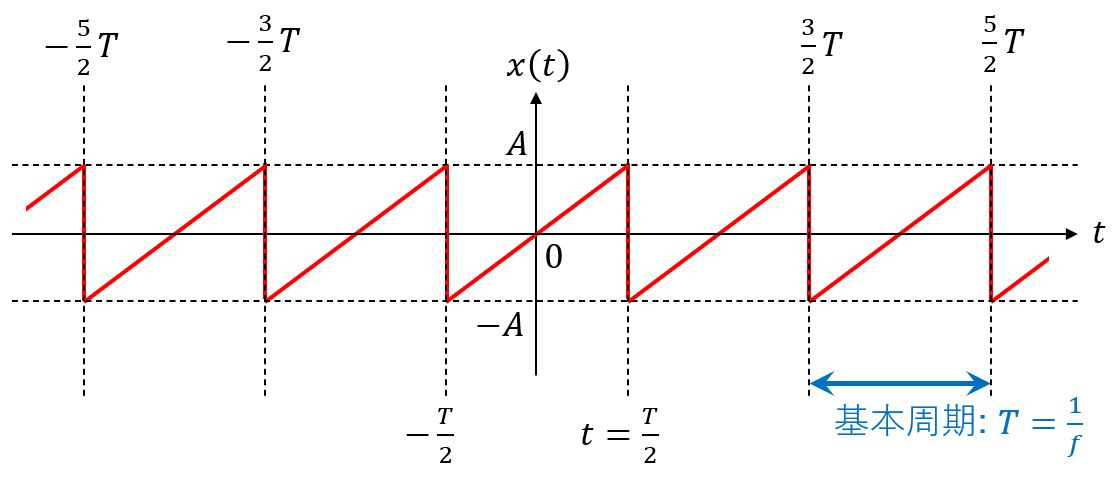




# 鋸歯状波の再生音

次のコードを実行して鋸歯状波を生成・再生してみよう．

In [ ]:
import numpy as np
import IPython.display
import matplotlib.pyplot as plt
from math import pi


### 条件設定：ここから ###

A = 0.4 # 振幅
L = 1.0 # 信号長 [秒]
f = 440 # 周波数 [Hz]

### 条件設定：ここまで ###


T = 1 / f # 基本周期（周波数に基づいて自動設定）
f_s = 44100 # サンプリング周波数（ここでは通常の音楽ファイルと同じ 44.1 [kHz] を設定しておく）

# 時刻 t における x(t) の値を返す関数
def sawtooth_wave(t):
  s = (t + T/2) % T - T/2
  return (2*A/T) * s

# 鋸歯状波を生成
n = np.arange(0, int(f_s * L))
x = sawtooth_wave(n / f_s)

# 波形を表示
Lw = 1 / 100 # 表示範囲（先頭 1/100 秒分を表示）
plt.figure(figsize=(16, 4))
plt.grid()
plt.title('Waveform')
plt.xlabel('Time [step]')
plt.ylabel('Amplitude')
plt.plot(np.arange(0, int(f_s * Lw)), x[ : int(f_s * Lw)])
plt.pause(1)
plt.close()

# 再生ボタンを作成
IPython.display.Audio(x, rate=f_s)

# 鋸歯状波のフーリエ級数展開

実は，上で再生した鋸歯状波は既に折り返し雑音を含んでいる．<br/>
この再生音もコンピュータで生成したものである以上，本来の鋸歯状波を適当なサンプリング周波数（44.1 [kHz]）の下でサンプリングしたものに他ならない．しかし，鋸歯状波は無限に高周波な成分を含むため，サンプリング周波数をどれだけ高くしても必ずエイリアシングが生じる．
このことを確かめるため，上記の $x(t)$ をフーリエ級数展開してみよう．




## フーリエ級数の定義式

$x(t)$ は基本周期 $T$ [秒] の周期信号であるから，
$$
x(t) = \sum_{k=-\infty}^{\infty} c_k e^{jk\omega_0 t}
$$
のようにフーリエ級数に展開できる．<br/>
ここで $\omega_0$ は基本角周波数であり，$\omega_0=\frac{2\pi}{T}$ [rad/秒] を満たす．

## $x(t)$ のフーリエ係数

フーリエ係数 $c_k$ を求めよう．
まず，$k=0$ のときは，
$$
c_0 = \frac{2A}{T^2} \int_{-\frac{T}{2}}^{\frac{T}{2}} t dt = \frac{A}{T^2} \left[ t^2 \right]_{-\frac{T}{2}}^{\frac{T}{2}} = 0
$$
である．
<br/>
次に $k \neq 0$ のときは，
$$
\begin{align}
c_k &= \frac{1}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} \left(\frac{2A}{T}p(t)\right)e^{-jk\omega_0t}dt \\
&= \frac{2A}{T^2} \int_{-\frac{T}{2}}^{\frac{T}{2}} t e^{-jk\omega_0t}dt \\
&= \frac{2A}{T^2} \left[ \frac{1}{k^2\omega_0^2} (1+jk\omega_0t) e^{-jk\omega_0t} \right]_{-\frac{T}{2}}^{\frac{T}{2}} \\
&= \frac{2A}{4\pi^2k^2} \left\{ -(e^{jk\pi} - e^{-jk\pi}) + jk\pi (e^{jk\pi} + e^{-jk\pi})\right\} = \frac{jA}{\pi^2 k^2} \left\{ k\pi \cos(k\pi) - \sin(k\pi) \right\}
\end{align}
$$
となる．<br/>
ここで，$k$ は整数であり $\sin(k\pi)=0$ なので，
$$
c_k = j\frac{A}{k\pi} \cos(k\pi) = j\frac{A}{k\pi}(-1)^k
$$
である．


## $x(t)$ のフーリエ級数展開

以上より，$x(t)$ は
$$
\begin{align}
x(t) &= \sum_{k=-\infty}^{-1} j\frac{A}{k\pi}(-1)^k e^{jk\omega_0t} + \sum_{k=1}^{\infty} j\frac{A}{k\pi}(-1)^k e^{jk\omega_0t} \\
&= jA \sum_{k=1}^{\infty} \frac{(-1)^k}{k\pi} \left( e^{jk\omega_0t} - e^{-jk\omega_0t} \right) \\
&= 2A \sum_{k=1}^{\infty} \frac{(-1)^{k+1}}{k\pi} \sin(k\omega_0t) .
\end{align}
$$
のようにフーリエ級数に展開できる．<br/>
上式から，鋸歯状波は無限に高周波な正弦波を成分として含む信号であり，コンピュータにより（離散時間信号として）正確に表現することはできないことが分かる．

# 帯域制限された鋸歯状波

折り返し雑音を防ぐため，$f_{\rm max}$ [Hz] 以上の成分を最初から除外した鋸歯状波を生成することを考える．<br/>
$\sin(k\omega_0t)=\sin(k(2\pi f)t)=\sin(2\pi (kf)t)$
が $kf$ [Hz] の正弦波であることに注意して，$kf<f_{\rm max}$ を満たす最大の整数を $N$ とおき，$x(t)$ の代わりに
$$
y(t) = 2A \sum_{k=1}^{N} \frac{(-1)^{k+1}}{k\pi} \sin(k\omega_0t)
$$
を生成する．<br/>
例えば $f_{\rm max}=4000$ [Hz]，$f=440$ [Hz] のとき，$N=9$ であり，$y(t)$ の最高周波数成分は $440 \times 9=3960$ [Hz]となる．


## サンプリング

上記の $y(t)$ をサンプリング周波数 $f_s$ [Hz]でサンプリングして得られる離散時間信号は
$$
y[n] = y\left(\frac{n}{f_s}\right) = 2A \sum_{k=1}^{N} \frac{(-1)^{k+1}}{k\pi} \sin\left(k\omega_0\frac{n}{f_s}\right)
$$
となる．

## エイリアシング

原信号 $y(t)$ は $f_{\rm max}$ [Hz] 以下の成分しか含まないので，$f_s \ge 2f_{\rm max}$ [Hz] のとき，エイリアシングを生じることなく $y[n]$ を生成できる．一方，$f_s < 2f_{\rm max}$ [Hz] の場合はエイリアシングが生じる．
このことを，次のコードを実行して確認しよう．<br/>なお，ここでは，例として $f_{\rm max}=4000$ [Hz] とし，$f_s = 8000$ [Hz] の場合と $f_s = 6000$ [Hz] の場合を比較している．


In [ ]:
import numpy as np
import IPython.display
import matplotlib.pyplot as plt
from numpy.fft import fft as fourier
from math import pi, floor
from numpy import sin


### 条件設定：ここから ###

# サンプリングに関する設定
f_s = 8000 # サンプリング周波数 [Hz]

# 鋸歯状波の設定
A = 0.4 # 振幅
L = 1.0 # 信号長 [秒]
f = 440 # 周波数 [Hz]

# y(t)の定義に関する設定
f_max = 4000 # 上限周波数 [Hz]

### 条件設定：ここまで ###


f_n = f_s / 2 # ナイキスト周波数 [Hz]
omega_0 = 2 * pi * f # 基本角周波数 [rad/秒]
N = floor(f_max / f) # kの上限，f_max [Hz]を超えないように自動設定

# 時刻 t における y(t) の値を返す関数
def band_limited_sawtooth_wave(t):
  s = sin(omega_0 * t) / pi # k == 1 のとき
  for k in range(2, N+1): # 2 <= k < N+1 すなわち 2 <= k <= N のとき
    v = sin(k * omega_0 * t) / (k * pi)
    s += (v if k % 2 == 1 else -v) # kが奇数のときは加算，偶数のときは減算
  return 2 * A * s

# y[n]を生成
Ly = int(L * f_s)
n = np.arange(0, Ly)
y = band_limited_sawtooth_wave(n / f_s)

# y[n]の波形を表示
Lw = 1 / 100 # 表示範囲（先頭 1/100 秒分を表示）
plt.figure(figsize=(16, 4))
plt.grid()
plt.title('Waveform')
plt.xlabel('Time [step]')
plt.ylabel('Amplitude')
plt.plot(np.arange(0, int(f_s * Lw)), y[ : int(f_s * Lw)], linewidth=0.5, linestyle='dashed')
plt.bar(np.arange(0, int(f_s * Lw)), y[ : int(f_s * Lw)], width=0.2)
plt.pause(1)
plt.close()

# y[n]の振幅スペクトルを表示
f_r = 6000 # 表示範囲（-6000〜6000 [Hz]）
c = np.abs(fourier(y)) / Ly # フーリエ係数を求め，その絶対値を取得
Lf = (f_r * Ly) // f_s
if Lf < Ly // 2:
  s = np.concatenate((c[-Lf : ], c[ : Lf]), axis=0)
else:
  s = np.zeros(2 * Lf)
  s[ : Ly // 2] = c[ : Ly // 2]
  s[-Ly // 2 : ] = c[-Ly // 2 : ]
  s = np.concatenate((s[-Lf : ], s[ : Lf]), axis=0)
plt.figure(figsize=(16, 4))
plt.grid()
plt.title('Amplitude spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.plot(np.arange(-f_r, f_r, f_s / Ly), s)
plt.pause(1)
plt.close()

# y[n]の再生ボタンを作成
IPython.display.Audio(y, rate=f_s)